# Smartphone Price model  using Linear Regression

## Credit 
1) The Dataset was downloaded from Kaggle *Mobile Phones Specifications and Prices in Kenya*  https://www.kaggle.com/datasets/lyraxvinns/mobile-phones-specifications-and-prices-in-kenya


# Step 1: Import the basic libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import all the necessary libraries for Models
We need to import the following libraries from sklearn
      
      --> LinearRegression

 Import the test split function for spliting the training data from the test data
      --> train_test_split

In [2]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,SGDRegressor
from sklearn.model_selection import train_test_split

## Import pandas library for data manipulation

In [3]:
import pandas as pd

# Step 2: Load the dataset to the platform

The Pandas library has an easy way to load in data, read_csv():

In [4]:
phoneprice = pd.read_csv("datasets/PhonesPriceInKenya.csv")

In order to view the data, how they are arranged we can use the head() function which shows the first 5 rows of data. To see the last five we use iris.head(-5)

In [5]:
phoneprice.head()

,Phone Title,Specs,Price(Kshs),Rating,Specs Score,Likes
0,Gionee M7 Power,"Screen:6.0 inches, 720 x 1440 pixels,Front Cam...","11,800",4.0,56%,13
1,Gionee M7,"Screen:6.01 inches, 1080 x 2160 pixels,Front C...","7,999",4.5,69%,8
2,Samsung Galaxy M21 6GB128GB,"Screen:6.4 inches, 1080 x 2340 pixels,Front Ca...","22,590",4.3,100%,30
3,Samsung Galaxy M21 4GB64GB,"Screen:6.4 inches, 1080 x 2340 pixels,Front Ca...","22,499",3.8,94%,31
4,Samsung Galaxy A31 6GB128GB,"Screen:6.4 inches, 1080 x 2400 pixels,Front Ca...","24,999",3.8,98%,31


## Step2: Preprocessing and Data Cleaning 
This data has comma separator in the **Price(Kshs)** and % sign in the **Specs Score** which is not regognized as interger,rather the dataframe sees the entry as a string. We use DataFrame.replace with regex=True for substrings replacement
1)We need to remove all the commas from the **Price(Kshs)**  

2)Remove the % sign from **Specs Score**

In [6]:
phoneprice['Price(Kshs)'] = phoneprice['Price(Kshs)'].replace(',','', regex=True)
phoneprice['Specs Score'] = phoneprice['Specs Score'].replace('%','', regex=True)
phoneprice

,Phone Title,Specs,Price(Kshs),Rating,Specs Score,Likes
0,Gionee M7 Power,"Screen:6.0 inches, 720 x 1440 pixels,Front Cam...",11800,4.0,56,13
1,Gionee M7,"Screen:6.01 inches, 1080 x 2160 pixels,Front C...",7999,4.5,69,8
2,Samsung Galaxy M21 6GB128GB,"Screen:6.4 inches, 1080 x 2340 pixels,Front Ca...",22590,4.3,100,30
3,Samsung Galaxy M21 4GB64GB,"Screen:6.4 inches, 1080 x 2340 pixels,Front Ca...",22499,3.8,94,31
4,Samsung Galaxy A31 6GB128GB,"Screen:6.4 inches, 1080 x 2400 pixels,Front Ca...",24999,3.8,98,31
...,...,...,...,...,...,...
1143,Nokia 105 2019,"Screen:1.77 inches, 120 x 160 pixels,Front Cam...",1900,3.0,8,11
1144,Nokia 220 4G,"Screen:2.4 inches, 240 x 320 pixels,Front Came...",NaN,4.0,11,8
1145,Nokia X71,"Screen:6.39 inches, 1080 x 2316 pixels,Front C...",NaN,3.0,93,53
1146,Nokia 22 3GB32GB,"Screen:5.71 inches, 720 x 1520 pixels,Front Ca...",NaN,3.4,47,50


select all rows with NaN values in Pandas DataFrame  Using isnull() to select all rows with NaN under a single DataFrame column

In [7]:
phoneprice[phoneprice['Price(Kshs)'].isnull()].count()

Phone Title    78
Specs          78
Price(Kshs)     0
Rating         78
Specs Score    78
Likes          78
dtype: int64

Convert all the numeric series to float datatype. This is to avoid situations that the entries are read as string

In [8]:
all_numeric_series = ['Price(Kshs)','Rating','Specs Score','Likes']
phoneprice[all_numeric_series] = phoneprice[all_numeric_series].astype(float)

Find the mean of the enries and use it to fill the NAN entries

In [9]:
mean_value_for_all = phoneprice[all_numeric_series].mean()
mean_value_for_all

Price(Kshs)    20453.197196
Rating             3.934408
Specs Score       67.733449
Likes             25.145470
dtype: float64

In [10]:
[phoneprice.fillna(value=mean_value_for_all, inplace=True)]
phoneprice.isna().any() # Check if there are any null values

Phone Title    False
Specs          False
Price(Kshs)    False
Rating         False
Specs Score    False
Likes          False
dtype: bool

Check the statistics of the dataset with the **describe()** function e.g the mean, max etc

In [11]:
phoneprice.describe()

,Price(Kshs),Rating,Specs Score,Likes
count,1148.000000,1148.000000,1148.000000,1148.000000
mean,20453.197196,3.934408,67.733449,25.145470
std,26479.611414,0.757267,22.359441,32.155663
min,84.000000,1.300000,8.000000,1.000000
25%,1664.750000,3.400000,52.000000,7.000000
50%,13189.500000,4.000000,62.000000,14.000000
75%,24124.750000,4.500000,92.000000,29.250000
max,170000.000000,5.000000,100.000000,296.000000



# Step 3: Define the inputs and outputs

We now need to define the **features(inputs** and **labels(outputs)**. We can do this easily with pandas by slicing the data table and choosing certain rows/columns.

**input/features** are those characteristics of the data that determines the class that they belong e.g color, lenght, weight etc

**output** is the class that they belong e.g positive/negative, 0/1, hot/cold, present/absent etc

You can achieve this by naming all the column names within a double square parenthesis.

Another way to do this using **iloc()**


In [12]:
# Let's tell the dataframe which column we want for the imputs/features.  
X = phoneprice[['Rating','Specs Score','Likes']]

# Let's tell the dataframe which column we want for the target/labels/output.  
y = phoneprice['Price(Kshs)']

In [13]:
X.head()

,Rating,Specs Score,Likes
0,4.0,56.0,13.0
1,4.5,69.0,8.0
2,4.3,100.0,30.0
3,3.8,94.0,31.0
4,3.8,98.0,31.0


# Step 4: Split the data to training and testing sets. 
Remember the default percentage is 80% for training and 20% for testing but you can change the percentages using test_size

Assign the split data into diffent arrays

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

# Step 5: Apply the model

In [15]:
regressor = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=.5)
SGD = SGDRegressor()

In [16]:
# Fit the model to the training data 
regressor.fit(X_train, y_train) 
lasso.fit(X_train, y_train) 
ridge.fit(X_train, y_train) 
SGD.fit(X_train, y_train)

SGDRegressor()

In [17]:
# Make the prediction
y_prediction_Linear = regressor.predict(X_test)
y_prediction_Lasso = lasso.predict(X_test)
y_prediction_Ridge = ridge.predict(X_test)
y_prediction_SGD = SGD.predict(X_test)

# Step 6: Metrics and Scores

There are a number of metrics that can be used to measure the perfomance of a model depending on the type c.f https://scikit-learn.org/stable/modules/model_evaluation.html

Regression model can be measured using several tools, we are going to use only three namely:
    
    1)Mean Absolute Error(MAE)
    2)Root Mean Square Error(RMSE)
    3)$R^2$ score: — the proportion of variance in y that can be explained by X


In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [19]:
#confusion matrix
def prediction_metrics(y_test, y_pred, plt_title=None):
    #mean_absolute_error test
    mae = mean_absolute_error(y_test, y_pred)
    #mean squared test
    mse = np.sqrt(mean_squared_error(y_test, y_pred))
    # r2  test
    r_2 = r2_score(y_test, y_pred)
    return mae, mse,r_2

In [20]:
scores=prediction_metrics(y_test, y_prediction_Linear)
print('mean absolute | mean squared | r2 score  ')
print([ '%.5f' % elem for elem in scores ])

mean absolute | mean squared | r2 score  
['16693.14096', '26377.75691', '0.01226']


In [21]:
scores=prediction_metrics(y_test, y_prediction_Lasso)
print('mean absolute | mean squared | r2 score  ')
print([ '%.5f' % elem for elem in scores ])

mean absolute | mean squared | r2 score  
['16693.14072', '26377.75375', '0.01226']


In [22]:
scores=prediction_metrics(y_test, y_prediction_Ridge)
print('mean absolute | mean squared | r2 score  ')
print([ '%.5f' % elem for elem in scores ])

mean absolute | mean squared | r2 score  
['16693.14127', '26377.75251', '0.01226']


In [23]:

scores=prediction_metrics(y_test, y_prediction_SGD)
print('mean absolute | mean squared | r2 score  ')
print([ '%.5f' % elem for elem in scores ])

mean absolute | mean squared | r2 score  
['4265821681171.55420', '4490505653957.33301', '-28625755725212292.00000']


# Step 7: Get the statistics of the predicted values

In [24]:
#Convert the array to pandas series
prediction_pd = pd.Series(y_prediction_Linear)

In [25]:
prediction_pd.describe()

count      230.000000
mean     20715.778923
std       4451.440596
min       8031.021329
25%      17829.441202
50%      19745.545467
75%      25683.709244
max      30211.489180
dtype: float64

## Step 8:  Display the rgeression model plot for the predicted data

In [26]:
import seaborn as sns

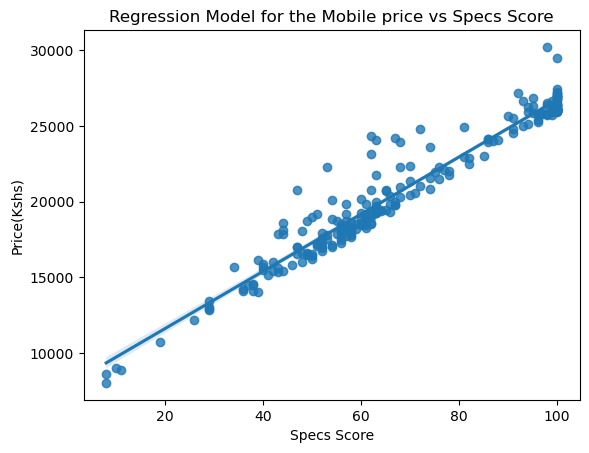

In [27]:
#Plot the price against the Specs Score
ax = sns.regplot(data=X, x=X_test['Specs Score'],y=y_prediction_Linear,fit_reg=True)
ax.set(xlabel='Specs Score', ylabel='Price(Kshs)')
ax.set(title = f'Regression Model for the Mobile price vs Specs Score')
plt.show()

# Step 9: Make the model interactive